In [1]:
import os
import numpy as np
import scipy as sp
import librosa as lib
import matplotlib.pyplot as plt
import sounddevice as sd
import pywt
import soundfile

In [2]:
def beam_form(N,theta,thetas,w,d):
    a=np.array([])
    a=(1/N)*(np.sin((N/2)*(w/343)*d*0.01*(np.cos(theta)-np.cos(thetas)))/np.sin((1/2)*(w/343)*d*0.01*(np.cos(theta)-np.cos(thetas))))
    return a

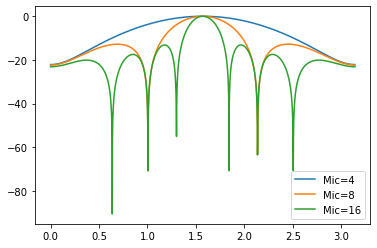

In [3]:
w=2*np.pi*2000
N=8
thetas=np.pi/2
d=4
theta=np.arange(0,np.pi,0.001)
N_mic=[4,8,16]
beam_mic_1=20*np.log10(np.abs(beam_form(N_mic[0],theta,thetas,w,d)))
beam_mic_2=20*np.log10(np.abs(beam_form(N_mic[1],theta,thetas,w,d)))
beam_mic_3=20*np.log10(np.abs(beam_form(N_mic[2],theta,thetas,w,d)))
plt.plot(theta,beam_mic_1)
plt.plot(theta,beam_mic_2)
plt.plot(theta,beam_mic_3)
plt.legend(["Mic=4","Mic=8","Mic=16"])

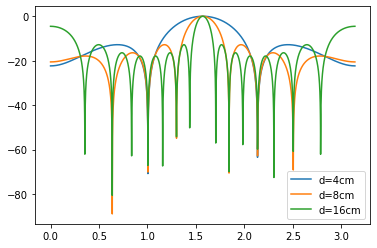

In [4]:
d_arr=[4,8,16]
beam_d_1=20*np.log10(np.abs(beam_form(N,theta,thetas,w,d_arr[0])))
beam_d_2=20*np.log10(np.abs(beam_form(N,theta,thetas,w,d_arr[1])))
beam_d_3=20*np.log10(np.abs(beam_form(N,theta,thetas,w,d_arr[2])))
plt.plot(theta,beam_d_1)
plt.plot(theta,beam_d_2)
plt.plot(theta,beam_d_3)
plt.legend(["d=4cm","d=8cm","d=16cm"])

<ipython-input-2-ed74a8f42328>:3: RuntimeWarning: invalid value encountered in true_divide
  a=(1/N)*(np.sin((N/2)*(w/343)*d*0.01*(np.cos(theta)-np.cos(thetas)))/np.sin((1/2)*(w/343)*d*0.01*(np.cos(theta)-np.cos(thetas))))


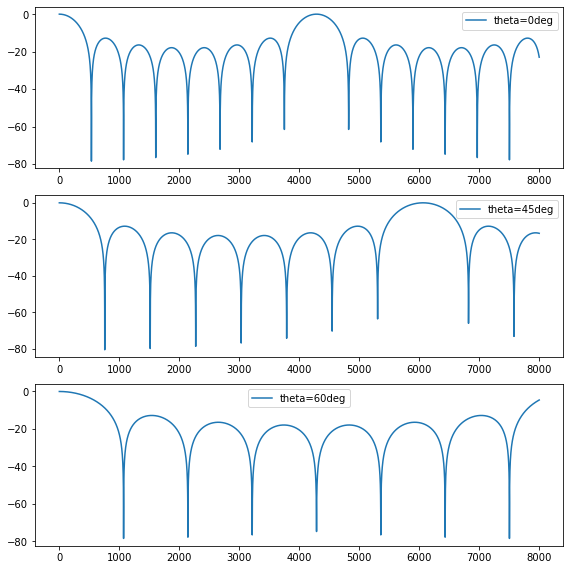

In [5]:
theta_arr=[0,np.pi/4,np.pi/3]
d=8
f=np.arange(0,8000)
w=2*np.pi*f
beam_theta_1=20*np.log10(np.abs(beam_form(N,theta_arr[0],thetas,w,d)))
beam_theta_2=20*np.log10(np.abs(beam_form(N,theta_arr[1],thetas,w,d)))
beam_theta_3=20*np.log10(np.abs(beam_form(N,theta_arr[2],thetas,w,d)))

fig, (ax1,ax2,ax3)=plt.subplots(3,figsize=(8,8))
ax1.plot(f,beam_theta_1)
ax2.plot(f,beam_theta_2)
ax3.plot(f,beam_theta_3)
ax1.legend(["theta=0deg"])
ax2.legend(["theta=45deg"])
ax3.legend(["theta=60deg"])
plt.tight_layout(pad=1.0)

In [6]:
#1.4#
def H_W(w,c,theta,N,d,i):
    temp=np.exp((1j*w*d*i*np.cos(theta))/c)
    temp=temp*(np.exp(-1j*((N-1)/2)*(w/c)*d*np.cos(theta)))
    h_w=np.conjugate(temp)
    h_w=h_w/N
    return h_w

In [7]:
sens0,sr0=lib.load("MicArraySimulatedSignals/sensor_0.wav",48000)
sens1,sr1=lib.load("MicArraySimulatedSignals/sensor_1.wav",48000) 
sens2,sr2=lib.load("MicArraySimulatedSignals/sensor_2.wav",48000)
sens3,sr3=lib.load("MicArraySimulatedSignals/sensor_3.wav",48000)
sens4,sr4=lib.load("MicArraySimulatedSignals/sensor_4.wav",48000)
sens5,sr5=lib.load("MicArraySimulatedSignals/sensor_5.wav",48000)
sens6,sr6=lib.load("MicArraySimulatedSignals/sensor_6.wav",48000)
source,sr=lib.load("MicArraySimulatedSignals/source.wav",48000)



In [10]:
sens0_fft=np.fft.fft(sens0)
mic0=np.fft.ifft(sens0_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens0_fft)),340,np.pi/4,7,0.08,0))
sens1_fft=np.fft.fft(sens1)
mic1=np.fft.ifft(sens1_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens1_fft)),340,np.pi/4,7,0.08,1))
sens2_fft=np.fft.fft(sens2)
mic2=np.fft.ifft(sens2_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens2_fft)),340,np.pi/4,7,0.08,2))
sens3_fft=np.fft.fft(sens3)
mic3=np.fft.ifft(sens3_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens3_fft)),340,np.pi/4,7,0.08,3))
sens4_fft=np.fft.fft(sens4)
mic4=np.fft.ifft(sens4_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens4_fft)),340,np.pi/4,7,0.08,4))
sens5_fft=np.fft.fft(sens5)
mic5=np.fft.ifft(sens5_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens5_fft)),340,np.pi/4,7,0.08,5))
sens6_fft=np.fft.fft(sens6)
mic6=np.fft.ifft(sens6_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens6_fft)),340,np.pi/4,7,0.08,6))
mic=mic0+mic1+mic2+mic3+mic4+mic5+mic6
mic=np.real(mic)
sd.play(mic,48000)
soundfile.write("sim_ds.wav",mic,48000)

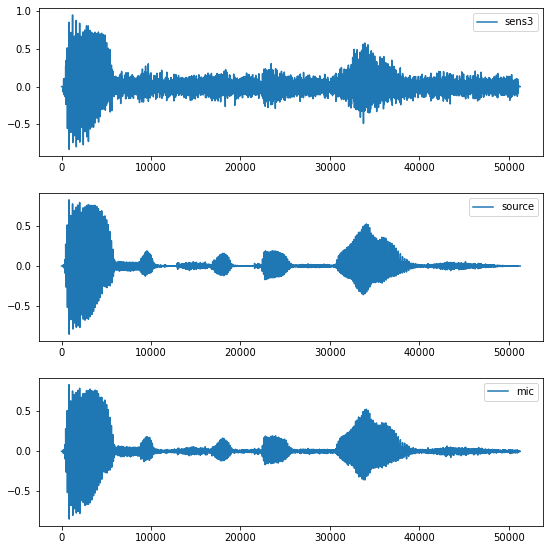

In [10]:
fig, (ax1,ax2,ax3)=plt.subplots(3,figsize=(8,8))
ax1.plot(sens3)
ax2.plot(source)
ax3.plot(mic)
ax1.legend(["sens3"])
ax2.legend(["source"])
ax3.legend(["mic"])
plt.tight_layout(pad=2.0)

<ipython-input-11-c672f25c69bc>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1,f1,np.log(Sxx1))


Text(0.5, 1.0, 'Sens3')

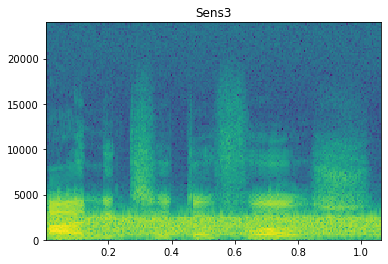

In [11]:
f1,t1,Sxx1=sp.signal.spectrogram(sens3,48000,return_onesided=True)
f2,t2,Sxx2=sp.signal.spectrogram(source,48000,return_onesided=True)
f3,t3,Sxx3=sp.signal.spectrogram(mic,48000,return_onesided=True)
plt.pcolormesh(t1,f1,np.log(Sxx1))
plt.title("Sens3")

<ipython-input-12-c48adde24d86>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t2,f2,np.log(Sxx2))


Text(0.5, 1.0, 'Source')

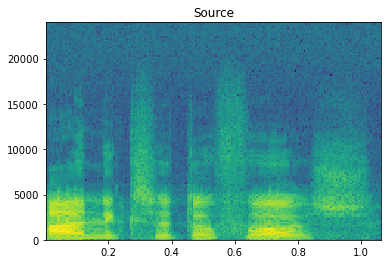

In [12]:
plt.pcolormesh(t2,f2,np.log(Sxx2))
plt.title("Source")

<ipython-input-13-c258cab9164c>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t3,f3[0:128],np.log(Sxx3))


Text(0.5, 1.0, 'Beam')

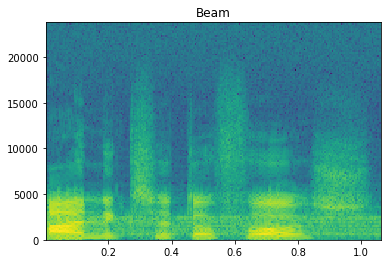

In [13]:
Sxx3=Sxx3[0:128]
f3=f3[0:128]
plt.pcolormesh(t3,f3[0:128],np.log(Sxx3))
plt.title("Beam")

In [14]:
noise1=sens3-source
noise2=mic-source
rms_noise1 = np.sqrt(np.mean(noise1**2))
rms_noise2 = np.sqrt(np.mean(noise2**2))
rms_beam = np.sqrt(np.mean(mic**2))
rms_mic = np.sqrt(np.mean(sens3**2))
SNR1=20*np.log10(rms_beam/rms_noise2)
SNR2=20*np.log10(rms_mic/rms_noise1)
print(np.abs(SNR1))
print(np.abs(SNR2))

20.34440470245634
4.821568131446838


In [15]:
#2.1b#
sig=sens3[22560:24000]
clean=source[22560:24000]
n=np.arange(0,1440,1)
noise1=noise1[22560:24000]
f1,sig_spec=sp.signal.welch(sig,48000,nperseg=1440,detrend=False,return_onesided=False)
f2,noise_spec=sp.signal.welch(noise1,48000,nperseg=1440,detrend=False,return_onesided=False)

h_w=1-(noise_spec/sig_spec)
nsd=np.power((1-h_w),2)

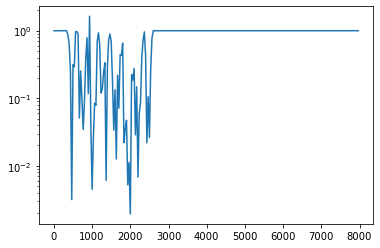

In [16]:
plt.plot(f2[0:240],np.abs(h_w)[0:240])
plt.yscale("log")

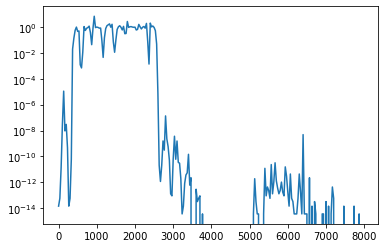

In [17]:
plt.plot(f2[0:240],nsd[0:240])
plt.yscale("log")

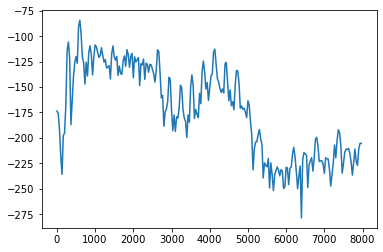

In [18]:
plt.plot(f2[0:240],20*np.log10(sig_spec)[0:240])

<ipython-input-19-a1e00081898e>:16: RuntimeWarning: divide by zero encountered in log10
  ax4.plot(f4[0:240],20*np.log10(noise_spec)[0:240])


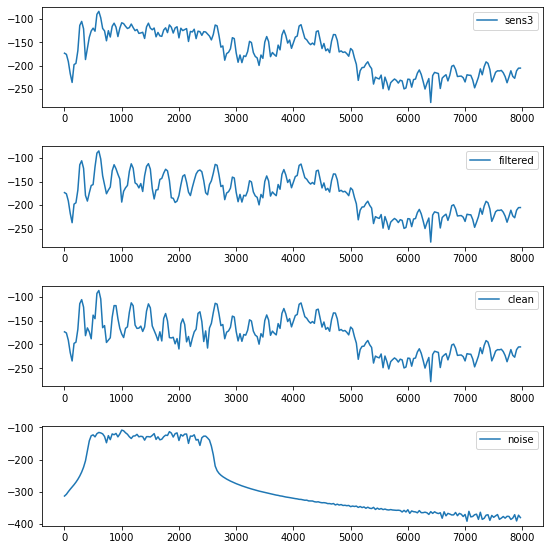

In [19]:
sig_fft=np.fft.fft(sig)
filtered=np.real(np.fft.ifft(sig_fft*h_w))
f1,sig_spec=sp.signal.welch(sig,48000,detrend=False,nperseg=1440,return_onesided=False)
f2,filt_spec=sp.signal.welch(filtered,48000,detrend=False,nperseg=1440,return_onesided=False)
f3,clean_spec=sp.signal.welch(clean,48000,detrend=False,nperseg=1440,return_onesided=False)
f4,noise_spec=sp.signal.welch(noise1,48000,detrend=False,nperseg=1440,return_onesided=False)
#plt.plot(f1[0:240],20*np.log10(sig_spec)[0:240])
#plt.plot(f2[0:240],20*np.log10(filt_spec)[0:240])
#plt.plot(f3[0:240],20*np.log10(clean_spec)[0:240])
#plt.plot(f4[0:240],20*np.log10(noise_spec)[0:240])
#plt.legend(["sens3","filtered","clean","noise"])
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,figsize=(8,8))
ax1.plot(f1[0:240],20*np.log10(sig_spec)[0:240])
ax2.plot(f2[0:240],20*np.log10(filt_spec)[0:240])
ax3.plot(f3[0:240],20*np.log10(clean_spec)[0:240])
ax4.plot(f4[0:240],20*np.log10(noise_spec)[0:240])
ax1.legend(["sens3"])
ax2.legend(["filtered"])
ax3.legend(["clean"])
ax4.legend(["noise"])
plt.tight_layout(pad=2.0)

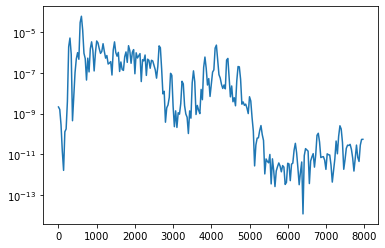

In [20]:
plt.plot(f1[0:240],(sig_spec)[0:240])
plt.yscale("log")

In [21]:
rms_filt = np.sqrt(np.mean(filtered**2))
rms_sig = np.sqrt(np.mean(sig**2))
rms_noise1 = np.sqrt(np.mean((sig-clean)**2))
rms_noise2 = np.sqrt(np.mean((filtered-clean)**2))                     
SNR_filt=20*np.log10(rms_filt/rms_noise2)
SNR_sig=20*np.log10(rms_sig/rms_noise1)
print(SNR_filt)
print(SNR_sig)

9.61128545747215
5.270766019821167


In [22]:
mic_seg=mic[22560:24000]
rms_mic_seg = np.sqrt(np.mean(mic_seg**2))
rms_noise3 = np.sqrt(np.mean((mic_seg-clean)**2))
SNR_mic_seg= 20*np.log10(rms_mic_seg/rms_noise3)
print(SNR_mic_seg)

20.513016937728136


<ipython-input-23-abf884625a2f>:14: RuntimeWarning: invalid value encountered in log10
  ax4.plot(f4[0:240],20*np.log10(mic_seg)[0:240])


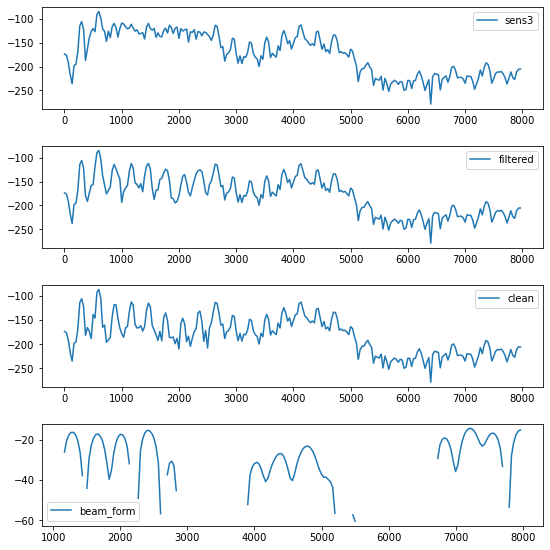

In [23]:
f1,sig_spec=sp.signal.welch(sig,48000,detrend=False,nperseg=1440,return_onesided=False)
f2,filt_spec=sp.signal.welch(filtered,48000,detrend=False,nperseg=1440,return_onesided=False)
f3,clean_spec=sp.signal.welch(clean,48000,detrend=False,nperseg=1440,return_onesided=False)
f4,noise_spec=sp.signal.welch(mic_seg,48000,detrend=False,nperseg=1440,return_onesided=False)
#plt.plot(f1[0:240],20*np.log10(sig_spec)[0:240])
#plt.plot(f2[0:240],20*np.log10(filt_spec)[0:240])
#plt.plot(f3[0:240],20*np.log10(clean_spec)[0:240])
#plt.plot(f4[0:240],20*np.log10(mic_seg)[0:240])
#plt.legend(["sens3","filtered","clean","beam_form"])
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,figsize=(8,8))
ax1.plot(f1[0:240],20*np.log10(sig_spec)[0:240])
ax2.plot(f2[0:240],20*np.log10(filt_spec)[0:240])
ax3.plot(f3[0:240],20*np.log10(clean_spec)[0:240])
ax4.plot(f4[0:240],20*np.log10(mic_seg)[0:240])
ax1.legend(["sens3"])
ax2.legend(["filtered"])
ax3.legend(["clean"])
ax4.legend(["beam_form"])
plt.tight_layout(pad=2.0)

In [11]:
#2.2.A.#
sens0,sr0=lib.load("MicArrayRealSignals/sensor_0.wav",48000)
sens1,sr1=lib.load("MicArrayRealSignals/sensor_1.wav",48000) 
sens2,sr2=lib.load("MicArrayRealSignals/sensor_2.wav",48000)
sens3,sr3=lib.load("MicArrayRealSignals/sensor_3.wav",48000)
sens4,sr4=lib.load("MicArrayRealSignals/sensor_4.wav",48000)
sens5,sr5=lib.load("MicArrayRealSignals/sensor_5.wav",48000)
sens6,sr6=lib.load("MicArrayRealSignals/sensor_6.wav",48000)
source,sr=lib.load("MicArrayRealSignals/source.wav",48000)

In [12]:
sens0_fft=np.fft.fft(sens0)
mic0=np.real(np.fft.ifft(sens0_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens0_fft)),340,np.pi/4,7,0.04,0)))
sens1_fft=np.fft.fft(sens1)
mic1=np.real(np.fft.ifft(sens1_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens1_fft)),340,np.pi/4,7,0.04,1)))
sens2_fft=np.fft.fft(sens2)
mic2=np.real(np.fft.ifft(sens2_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens2_fft)),340,np.pi/4,7,0.04,2)))
sens3_fft=np.fft.fft(sens3)
mic3=np.real(np.fft.ifft(sens3_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens3_fft)),340,np.pi/4,7,0.04,3)))
sens4_fft=np.fft.fft(sens4)
mic4=np.real(np.fft.ifft(sens4_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens4_fft)),340,np.pi/4,7,0.04,4)))
sens5_fft=np.fft.fft(sens5)
mic5=np.real(np.fft.ifft(sens5_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens5_fft)),340,np.pi/4,7,0.04,5)))
sens6_fft=np.fft.fft(sens6)
mic6=np.real(np.fft.ifft(sens6_fft*H_W(np.arange(0,2*np.pi*48000,2*np.pi*48000/len(sens6_fft)),340,np.pi/4,7,0.04,6)))
mic=mic0+mic1+mic2+mic3+mic4+mic5+mic6
sd.play(source,48000)
soundfile.write("real_ds.wav",mic,48000)

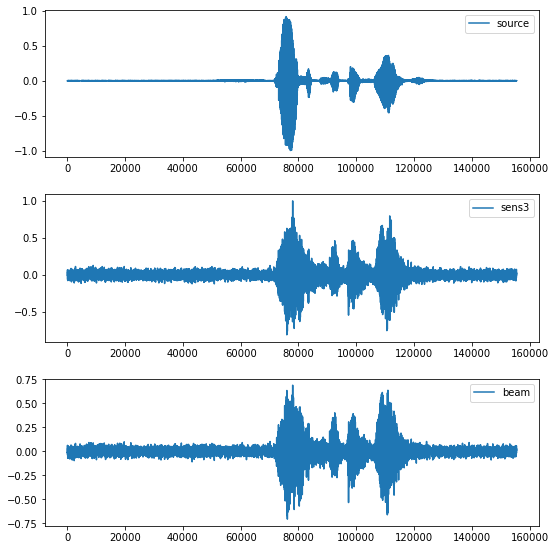

In [35]:
fig,(ax1,ax2,ax3)=plt.subplots(3,figsize=(8,8))
ax1.plot(source)
ax2.plot(sens3)
ax3.plot(mic)
ax1.legend(["source"])
ax2.legend(["sens3"])
ax3.legend(["beam"])
plt.tight_layout(pad=2.0)

<ipython-input-36-c672f25c69bc>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1,f1,np.log(Sxx1))


Text(0.5, 1.0, 'Sens3')

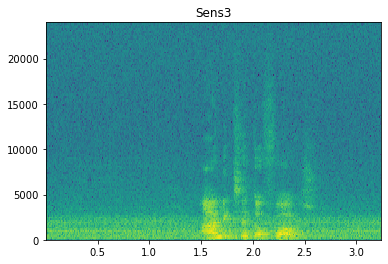

In [36]:
f1,t1,Sxx1=sp.signal.spectrogram(sens3,48000,return_onesided=True)
f2,t2,Sxx2=sp.signal.spectrogram(source,48000,return_onesided=True)
f3,t3,Sxx3=sp.signal.spectrogram(mic,48000,return_onesided=True)
plt.pcolormesh(t1,f1,np.log(Sxx1))
plt.title("Sens3")

<ipython-input-37-c48adde24d86>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t2,f2,np.log(Sxx2))


Text(0.5, 1.0, 'Source')

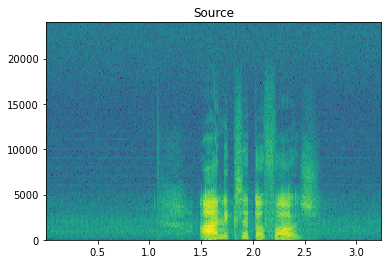

In [37]:
plt.pcolormesh(t2,f2,np.log(Sxx2))
plt.title("Source")

<ipython-input-38-c258cab9164c>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t3,f3[0:128],np.log(Sxx3))


Text(0.5, 1.0, 'Beam')

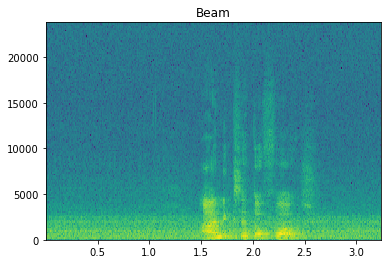

In [38]:
Sxx3=Sxx3[0:128]
f3=f3[0:128]
plt.pcolormesh(t3,f3[0:128],np.log(Sxx3))
plt.title("Beam")

In [66]:
SSNR1=0
noise=sens3[0:5000]
for i in range(85):
    a=np.sum((sens3[i*1830:i*1830+1830])**2)
    b=np.sum(noise**2)
    a=a-b
    SNR=10*np.log10(a/b)
    if(SNR>35):
        SNR=35
    if(SNR>-1):
        SSNR1=SSNR1+SNR
SSNR1=SSNR1/85 

SSNR2=0
noise=mic[0:5000]
for i in range(85): 
    a=np.sum(mic[i*1830:i*1830+1830]**2)
    b=np.sum(noise**2)
    a=a-b
    SNR=10*np.log10(a/b)
    if(SNR>35):
        SNR=35
    if(SNR>-1):
        SSNR2=SSNR2+SNR
SSNR2=SSNR2/85
print(SSNR1)
print(SSNR2)

1.7952835875398971
1.8074657196868362


<ipython-input-66-57c71a6bc168>:7: RuntimeWarning: invalid value encountered in log10
  SNR=10*np.log10(a/b)
<ipython-input-66-57c71a6bc168>:20: RuntimeWarning: invalid value encountered in log10
  SNR=10*np.log10(a/b)
